In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

 ## Define the file path here

In [4]:
folder_path = ""
file_title = "fine-grained-data ___boundaryMean0.1___boundarySD0.15___SPIROMean0.25___SPIROSD0.15___IdentityTypeindividual___RS20"
file_name = file_title + ".csv"
file_path = os.path.join(folder_path, file_name)


 ## Reading metadata then the data
 

In [6]:
# Step 1: Read the metadata (first 15 rows)
metadata_df = pd.read_csv(file_path, nrows=15, header=None)  # No headers for metadata
metadata_dict = dict(zip(metadata_df[0], metadata_df[1]))  # Convert to dictionary

# Step 2: Read the actual data, using row 16 as the header
df = pd.read_csv(file_path, skiprows=15)
print(metadata_dict)
print(df.columns)

{'random-seed': '20', 'conformity-mean': '0.2', 'conformity-sd': '0', 'conformity-distribution': 'normal', 'HK-distribution': 'false', 'N': '101', 'boundary-mean': '0.1', 'boundary-sd': '0.15', 'boundary-distribution': 'normal', 'SPIRO-mean': '0.25', 'SPIRO-sd': '0.15', 'SPIRO-distribution': 'normal', 'Identity-Type': 'individual', 'Identity-Levels': '7', 'Use_Identity?': 'true'}
Index(['timeStep', ' agentID', ' opinion', ' previousOpinion', ' boundary',
       ' conformity', ' SPIRO', ' groupNumber'],
      dtype='object')


 ## Some needed cleanup

In [8]:
# To remove accidental spaces before the column name
df.columns = df.columns.str.strip()

# 'opinion' and 'previousOpinion' have leading and ending brackets and need to be converted to numerics
df['opinion'] = pd.to_numeric(df['opinion'].str.strip("[]"))
df['previousOpinion'] = pd.to_numeric(df['previousOpinion'].str.strip("[]"))


In [9]:
print(df)

        timeStep  agentID  opinion  previousOpinion  boundary  conformity  \
0              0       37   0.6526            0.656     0.144         0.2   
1              0       98  -0.4550           -0.452     0.043         0.2   
2              0       51  -0.7128           -0.724     0.183         0.2   
3              0       62   0.6022            0.604     0.014         0.2   
4              0       17   0.1498            0.142     0.170         0.2   
...          ...      ...      ...              ...       ...         ...   
100995       999       42   0.2320            0.232     0.127         0.2   
100996       999       56   0.2320            0.232     0.060         0.2   
100997       999       81   0.2200            0.220     0.298         0.2   
100998       999       13   0.2380            0.238     0.170         0.2   
100999       999       45   0.2140            0.214     0.333         0.2   

        SPIRO  groupNumber  
0         0.5          219  
1         0.3    

## Opinion Plot

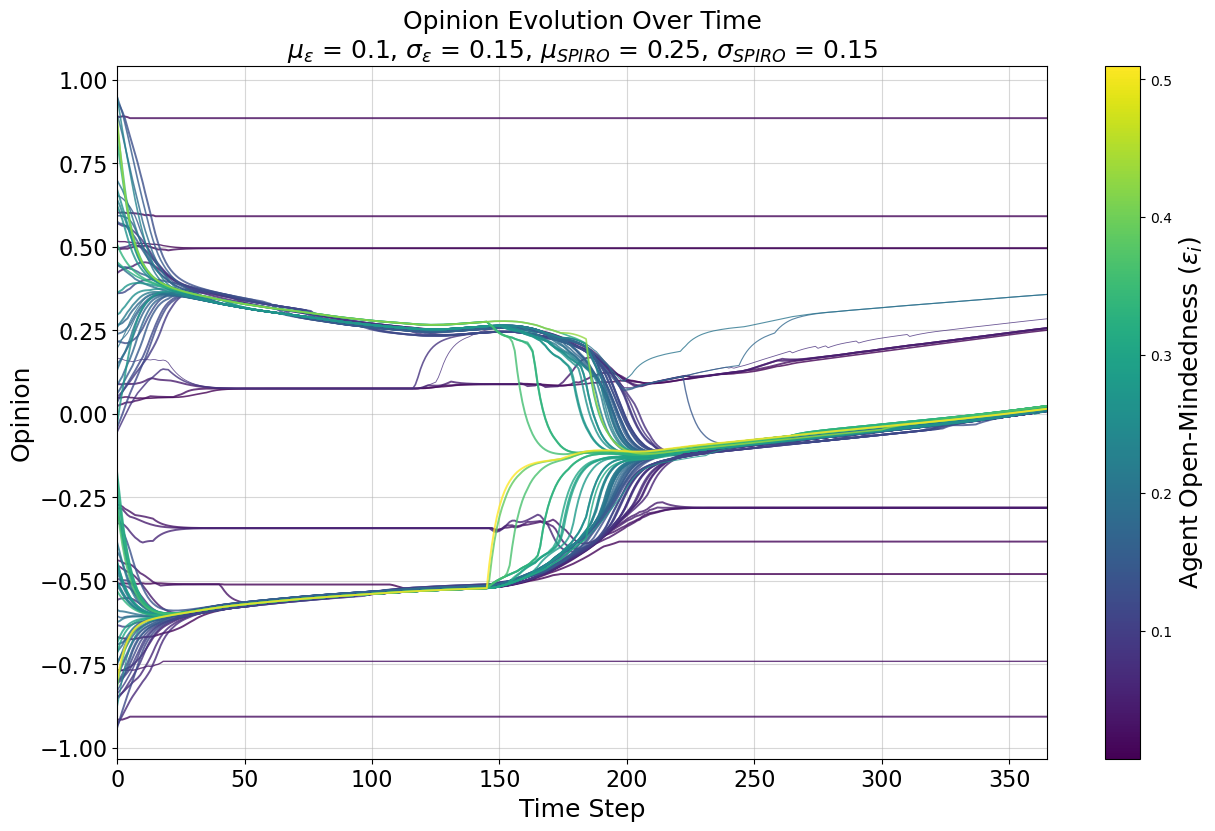

In [35]:


# Extract metadata values
mu_epsilon = metadata_dict["boundary-mean"]  # Mean boundary
sigma_epsilon = metadata_dict["boundary-sd"]  # Std boundary
mu_SPIRO = metadata_dict["SPIRO-mean"]  # Mean SPIRO
sigma_SPIRO = metadata_dict["SPIRO-sd"]  # Std SPIRO


# Normalize boundary values to a colormap range (0 to 1)
norm = plt.Normalize(df["boundary"].min(), df["boundary"].max())
cmap = plt.cm.viridis  # Choose colormap
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  # Create color mapping

# Sort agents by boundary in ascending order
sorted_agents = df.groupby("agentID").first().sort_values(by="boundary").index

# Create the plot
fig, ax = plt.subplots(figsize=(15, 9))

# Loop through each agent in sorted order (low boundary first, high boundary last)
for agent_id in sorted_agents:
    agent_data = df[df["agentID"] == agent_id]
    linewidth = 1.5 + 2*(0.25 - agent_data["SPIRO"].iloc[0])
    color = cmap(norm(agent_data["boundary"].iloc[0]))  # Pick color based on first boundary value
    ax.plot(agent_data["timeStep"], agent_data["opinion"], color=color, alpha=0.8, linewidth=linewidth)

# Add colorbar
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Agent Open-Mindedness ($\\epsilon_{i}$)", fontsize = 18)

# Labels and title
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim([0, 365])
ax.set_xlabel("Time Step", fontsize = 18)
ax.set_ylabel(f"Opinion", fontsize = 18)
# LaTeX formatted title with subscripts
ax.set_title(
    f"Opinion Evolution Over Time\n"
    f"$\\mu_\\epsilon$ = {mu_epsilon}, $\\sigma_\\epsilon$ = {sigma_epsilon}, "
    f"$\\mu_{{SPIRO}}$ = {mu_SPIRO}, $\\sigma_{{SPIRO}}$ = {sigma_SPIRO}", fontsize = 18
)
ax.grid(True, linestyle="-", alpha=0.5)

            
this_figure_path = os.path.join(folder_path, file_title + ".png")
plt.savefig(this_figure_path, dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


## Seeing Group Structure evolve


In [13]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # ----- First Plot: Number of Unique Groups Over Time -----
# unique_groups_per_time = df.groupby("timeStep")["groupNumber"].nunique()

# # ----- Second Plot: Fraction of Agents in Groups Over Time -----
# # Step 1: Count agents in each group at each time step
# agents_per_group = df.groupby(["timeStep", "groupNumber"])["agentID"].count()

# # Step 2: Compute total agents per time step
# total_agents_per_time = agents_per_group.groupby("timeStep").sum()

# # Step 3: Convert counts to fractions by dividing each group count by the total agents at that time step
# agents_fraction_per_group = agents_per_group.div(total_agents_per_time, level="timeStep")

# # Step 4: Pivot table to get a wide format (timeStep as rows, group sizes as columns)
# fraction_per_time_wide = agents_fraction_per_group.unstack(fill_value=0)

# # Step 5: Sort each row’s values in descending order (largest groups first)
# sorted_fractions = fraction_per_time_wide.apply(lambda x: sorted(x, reverse=True), axis=1, result_type="expand")

# # ----- Create the Figure with Two Subplots -----
# fig, ax = plt.subplots(figsize=(15, 9))


# # # Second subplot: Stacked Bar Chart of Group Fractions Over Time
# sorted_fractions.plot(kind="bar", stacked=True, ax=axes[1], width=1, cmap="viridis", alpha=0.8)

# # # Formatting for second plot
# # axes[1].set_xlabel("Time Step", fontsize=14)
# # axes[1].set_ylabel("Fraction of Agents", fontsize=14)
# # axes[1].grid(axis="y", linestyle="--", alpha=0.5)
# # axes[1].legend_.remove()  # Hide legend since group numbers aren't meaningful

# # Adjust layout
# plt.tight_layout()
# plt.show()
